# Metallome / Metalloproteomic Visualization Tool
### Using *Pseudomonas aeruginosa* dataset
### Mak Saito, November 2024

#### Overview
This project explores the metalloproteomic dataset of *Pseudomonas aeruginosa* grown under both oxic and anoxic conditions. 

### 1. Metals: 3D comparisons - oxic and anoxic treatments

In [45]:
### Oxic and anoxic metals
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots


# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0)

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])


# Create Dropdown Menu for metals
metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# Create Dropdown Menu for contour height
contour_height_dropdown = widgets.Dropdown(
    options=[0.8, 1, 1.2],
    description='Contour Height:',
    disabled=False,
)

# Define Plotting Function
def plot_metal(metal, contour_height_factor):
    # Creating a pivot table to reshape the data
    pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    pivot_table_ao = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)

    # Extracting the x, y, and z data from the pivot table
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    X_ao, Y_ao = np.meshgrid(pivot_table_ao.columns, pivot_table_ao.index)
    Z_ao = pivot_table_ao.values
    
    # Define the height for the contour plot based on the selected factor
    z_min, z_max = np.min(Z), np.max(Z)
    contour_height = z_min + contour_height_factor * (z_max - z_min)
    z_min_ao, z_max_ao = np.min(Z_ao), np.max(Z_ao)
    contour_height_ao = z_min_ao + contour_height_factor * (z_max_ao - z_min_ao)

    # Add subplots
    # Creating subplots with Plotly
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles=(f"Metal (oxic): {metal}", f"Metal (anoxic): {metal}"))
  
    # Creating the surface plot with Plotly
    #fig = go.Figure()

    # Add surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Hot', showscale=False), row=1, col=1)
    fig.add_trace(go.Surface(z=Z_ao, x=X_ao, y=Y_ao, colorscale='Hot', showscale=False), row=1, col=2)

    # Add contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z) * contour_height,
        x=X,
        y=Y,
        surfacecolor=Z,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,  # Adjusted transparency
        contours=dict(
            x=dict(show=False, highlight=False),  # Remove grid lines
            y=dict(show=False, highlight=False),  # Remove grid lines
            z=dict(show=True, project=dict(z=True))
        )
    ),row=1, col=1)

    fig.add_trace(go.Surface(
        z=np.ones_like(Z_ao) * contour_height_ao,
        x=X_ao,
        y=Y_ao,
        surfacecolor=Z_ao,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,  # Adjusted transparency
        contours=dict(
            x=dict(show=False, highlight=False),  # Remove grid lines
            y=dict(show=False, highlight=False),  # Remove grid lines
            z=dict(show=True, project=dict(z=True))
        )
    ),row=1, col=2)
 
    
    # Adding titles, labels, and setting different shades of grey for backgrounds
    fig.update_layout(
        title=metal,
        width=1150,  # Set the width of the figure
        height=600,  # Set the height of the figure
        scene=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )
    fig.update_layout(
        title=metal,
        scene2=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )

    # Display the plot
    fig.show()
    fig.write_html("metals_2panel_surface.html")
   

# Display Interactive Widgets
widgets.interact(plot_metal, metal=metal_dropdown, contour_height_factor=contour_height_dropdown)


interactive(children=(Dropdown(description='Metal:', options=('Al 27', 'As 75', 'Co 59', 'Cr 52', 'Cu 63', 'Fe…

<function __main__.plot_metal(metal, contour_height_factor)>

### 1b. Metals: 2D contour plots - oxic and anoxic treatments

In [47]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0)

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menu for metals
metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# Define Plotting Function
def plot_metal(metal):
    # Creating a pivot table to reshape the data
    pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    pivot_table_ao = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)

    # Extracting the x, y, and z data from the pivot table
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    X_ao, Y_ao = np.meshgrid(pivot_table_ao.columns, pivot_table_ao.index)
    Z_ao = pivot_table_ao.values

    # Define the height for the contour plot based on the selected factor
    z_min, z_max = np.min(Z), np.max(Z)
    z_min_ao, z_max_ao = np.min(Z_ao), np.max(Z_ao)
    
    # Add subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Metal (oxic): {metal}", f"Metal (anoxic): {metal}"))

    # Add contour plot for oxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z,
        x=X[0],
        y=Y[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min,
            end=z_max,
            size=(z_max - z_min) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=1)

    # Add contour plot for anoxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z_ao,
        x=X_ao[0],
        y=Y_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min_ao,
            end=z_max_ao,
            size=(z_max_ao - z_min_ao) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=2)

    # Update layout for better visualization and separate legends
    fig.update_layout(
        #title=f"Contour Plot of {metal}",
        width=1150,
        height=600,
        xaxis_title='AE Fraction',
        yaxis_title='SE Fraction'
    )

    # Display the plot
    fig.show()

# Display Interactive Widgets
widgets.interact(plot_metal, metal=metal_dropdown)


interactive(children=(Dropdown(description='Metal:', options=('Al 27', 'As 75', 'Co 59', 'Cr 52', 'Cu 63', 'Fe…

<function __main__.plot_metal(metal)>

### 2a. Proteins: 2D contour plots oxic and anoxic treatments - need to clean up

In [49]:
# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    #options=sorted(pa_columns),  # Sort the PA#### oxic columns, commented out for anoxic only
    options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns
    description='Protein:',
    disabled=False,
)

def plot_data(protein, metal):
    # Creating a pivot table to reshape the protein data
    protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    protein_pivot_table_ao = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein_ao, Y_protein_ao = np.meshgrid(protein_pivot_table_ao.columns, protein_pivot_table_ao.index)
    Z_protein_ao = protein_pivot_table_ao.values

    # Creating a pivot table to reshape the metal data
    metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) 
    #metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for oxic only
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    #combined_text = f"{protein} - {processed_text}"
    combined_text = f"{protein} - {processed_text} (oxic)"
    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
   
    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
   
     # Add subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Protein (oxic): {protein}", f"Protein (anoxic): {protein}"))

    # Add protein surface plot with a hotter color palette
    #fig.add_trace(go.Surface(z=Z_protein, x=X_protein, y=Y_protein, colorscale='Hot', showscale=False), row=1, col=1)

    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein,
        x=X_protein[0],
        y=Y_protein[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=1)
    
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein_ao,
        x=X_protein_ao[0],
        y=Y_protein_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=2)
    
  # Update layout for better visualization and separate legends
    fig.update_layout(
        title=f"Contour Plot of {metal}",
        width=1150,
        height=600,
        xaxis_title='AE Fraction',
        yaxis_title='SE Fraction'
    )

    # Display the plot
    fig.show()
    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0008', 'PA000…

<function __main__.plot_data(protein, metal)>

### 3a. Proteins and Metals:2D contour plots, Oxic and Anoxic Working

In [90]:
# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    #options=sorted(pa_columns),  # Sort the PA#### oxic columns, commented out for anoxic only
    options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns
    description='Protein:',
    disabled=False,
)

def plot_data(protein, metal):
    # Creating a pivot table to reshape the protein data
    protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    protein_pivot_table_ao = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein_ao, Y_protein_ao = np.meshgrid(protein_pivot_table_ao.columns, protein_pivot_table_ao.index)
    Z_protein_ao = protein_pivot_table_ao.values

    # Creating a pivot table to reshape the metal data
    metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) 
    #metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for oxic only
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    #combined_text = f"{protein} - {processed_text}"
    combined_text = f"{protein} - {processed_text} (oxic)"
    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
   
    # Creating a pivot table to reshape the data
    pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    pivot_table_ao = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)

    # Extracting the x, y, and z data from the pivot table
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    X_ao, Y_ao = np.meshgrid(pivot_table_ao.columns, pivot_table_ao.index)
    Z_ao = pivot_table_ao.values

    # Define the height for the contour plot based on the selected factor
    z_min, z_max = np.min(Z), np.max(Z)
    z_min_ao, z_max_ao = np.min(Z_ao), np.max(Z_ao)
    
    
    # Add subplots
    fig = make_subplots(rows=2, cols=2, subplot_titles=(f"Metal (oxic): {metal}", f"Metal (anoxic): {metal}",
                                                        f"Protein {protein} (oxic)", f"Protein {protein} (anoxic)"))
    
    # Add contour plot for oxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z,
        x=X[0],
        y=Y[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min,
            end=z_max,
            size=(z_max - z_min) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=1)

    # Add contour plot for anoxic metals without colorbar
    fig.add_trace(go.Contour(
        z=Z_ao,
        x=X_ao[0],
        y=Y_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            start=z_min_ao,
            end=z_max_ao,
            size=(z_max_ao - z_min_ao) / 10,
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=1, col=2)



    
    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein,
        x=X_protein[0],
        y=Y_protein[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=2, col=1)
    
    fig.add_trace(go.Contour(
        #z=Z_ao,
        #x=X_ao[0],
        #y=Y_ao[:, 0],
        z=Z_protein_ao,
        x=X_protein_ao[0],
        y=Y_protein_ao[:, 0],
        colorscale='Hot',
        contours=dict(
            coloring='heatmap'
        ),
        showscale=False  # Remove colorbar
    ), row=2, col=2)
    
  # Update layout for better visualization and separate legends
    fig.update_layout(
        title=f"Contour Plot of {metal}",
        width=1150,
        height=800,
        xaxis_title='AE Fraction',
        yaxis_title='SE Fraction'
    )
    # Set the x-axis and y-axis range for all subplots
    #fig.update_xaxes(range=[100, 1000])
    fig.update_xaxes(range=[100, 600])
    fig.update_yaxes(range=[7,38])
    # Display the plot
    fig.show()
   
    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0008', 'PA000…

<function __main__.plot_data(protein, metal)>

### 3b. Protein and Metals: 3D plots side by side, selectable (oxic)

In [53]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# load metals
# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### oxic columns
    #options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns, commented out for oxic only
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    #options=sorted(metal_columns_ao),  # Sort the metal columns, commented out for oxic only
    description='Metal:',
    disabled=False,
)

contour_height_dropdown = widgets.Dropdown(
    options=[0.8, 1, 1.2],
    description='Contour Height:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, contour_height_factor):
    # Creating a pivot table to reshape the protein data
    protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) 
    #protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for oxic only
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    # Creating a pivot table to reshape the metal data
    metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) 
    #metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for oxic only
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    #combined_text = f"{protein} - {processed_text}"
    combined_text = f"{protein} - {processed_text} (oxic)"
    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
    contour_height_protein = z_min_protein + contour_height_factor * (z_max_protein - z_min_protein)

    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
    contour_height_metal = z_min_metal + contour_height_factor * (z_max_metal - z_min_metal)

    # Creating subplots with Plotly
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles=(f"Protein: {protein}", f"Metal: {metal}"))

    # Add protein surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_protein, x=X_protein, y=Y_protein, colorscale='Hot', showscale=False), row=1, col=1)

    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_protein) * contour_height_protein,
        x=X_protein,
        y=Y_protein,
        surfacecolor=Z_protein,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=1)

    # Add metal surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_metal, x=X_metal, y=Y_metal, colorscale='Hot', showscale=False), row=1, col=2)

    # Add metal contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_metal) * contour_height_metal,
        x=X_metal,
        y=Y_metal,
        surfacecolor=Z_metal,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=2)

    # Update layout for subplots and set figure size
    fig.update_layout(
        title=combined_text,
        width=1150,  # Set the width of the figure
        height=600,  # Set the height of the figure
        scene=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{protein}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        ),
        scene2=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )
    
    # Display the plot
    fig.show()
    fig.write_html("metals_proteins__dropdown_plot.html")
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, contour_height_factor=contour_height_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0006', 'PA000…

<function __main__.plot_data(protein, metal, contour_height_factor)>

### 3c. Protein and Metals: 3D side by side, selectable (anoxic)

In [55]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# load metals
# Reading the Excel file and specific sheet
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')

# Setting the first column (Sample_ID) as the index
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# load proteins
# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Convert relevant columns to numeric types if necessary 
pr_o = pr_o.apply(pd.to_numeric, errors='ignore')
pr_ao = pr_ao.apply(pd.to_numeric, errors='ignore')

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    #options=sorted(pa_columns),  # Sort the PA#### oxic columns, commented out for anoxic only
    options=sorted(pa_columns_ao),  # Sort the PA#### anoxic columns
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    #options=sorted(metal_columns),  # Sort the metal columns, commented out for anoxic only
    options=sorted(metal_columns_ao),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

contour_height_dropdown = widgets.Dropdown(
    options=[0.8, 1, 1.2],
    description='Contour Height:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, contour_height_factor):
    # Creating a pivot table to reshape the protein data
    #protein_pivot_table = pr_o.pivot(index='SE Fraction', columns='AE Fraction', values=protein) # commented out for anoxic only
    protein_pivot_table = pr_ao.pivot(index='SE Fraction', columns='AE Fraction', values=protein)
    X_protein, Y_protein = np.meshgrid(protein_pivot_table.columns, protein_pivot_table.index)
    Z_protein = protein_pivot_table.values

    # Creating a pivot table to reshape the metal data
    #metal_pivot_table = m_oxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal) #  commented out for anoxic only
    metal_pivot_table = m_anoxic.pivot(index='SE Fraction', columns='AE Fraction', values=metal)
    X_metal, Y_metal = np.meshgrid(metal_pivot_table.columns, metal_pivot_table.index)
    Z_metal = metal_pivot_table.values
   
    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_ao_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    combined_text = f"{protein} - {processed_text} (anoxic)"

    # Define the height for the contour plot based on the selected factor
    z_min_protein, z_max_protein = np.min(Z_protein), np.max(Z_protein)
    contour_height_protein = z_min_protein + contour_height_factor * (z_max_protein - z_min_protein)

    z_min_metal, z_max_metal = np.min(Z_metal), np.max(Z_metal)
    contour_height_metal = z_min_metal + contour_height_factor * (z_max_metal - z_min_metal)

    # Creating subplots with Plotly
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles=(f"Protein: {protein}", f"Metal: {metal}"))

    # Add protein surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_protein, x=X_protein, y=Y_protein, colorscale='Hot', showscale=False), row=1, col=1)

    # Add protein contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_protein) * contour_height_protein,
        x=X_protein,
        y=Y_protein,
        surfacecolor=Z_protein,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=1)

    # Add metal surface plot with a hotter color palette
    fig.add_trace(go.Surface(z=Z_metal, x=X_metal, y=Y_metal, colorscale='Hot', showscale=False), row=1, col=2)

    # Add metal contour plot at a constant height above the surface
    fig.add_trace(go.Surface(
        z=np.ones_like(Z_metal) * contour_height_metal,
        x=X_metal,
        y=Y_metal,
        surfacecolor=Z_metal,
        colorscale='Hot',
        showscale=False,
        opacity=0.6,
        contours=dict(
            x=dict(show=False, highlight=False),
            y=dict(show=False, highlight=False),
            z=dict(show=True, project=dict(z=True))
        )
    ), row=1, col=2)

    # Update layout for subplots and set figure size
    fig.update_layout(
        title=combined_text,
        width=1150,  # Set the width of the figure
        height=600,  # Set the height of the figure
        scene=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{protein}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        ),
        scene2=dict(
            xaxis_title='AE Fraction',
            yaxis_title='SE Fraction',
            zaxis_title=f'{metal}',
            xaxis=dict(showgrid=False, backgroundcolor='lightgrey'),
            yaxis=dict(showgrid=False, backgroundcolor='darkgrey'),
            zaxis=dict(showgrid=False, backgroundcolor='whitesmoke'),
            camera_eye=dict(x=1.5, y=1.5, z=1)
        )
    )
    
    # Display the plot
    fig.show()
    fig.write_html("metals_proteins__dropdown_plot.html")
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, contour_height_factor=contour_height_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0008', 'PA000…

<function __main__.plot_data(protein, metal, contour_height_factor)>

### 4a. Table: oxic proteins with maxima at 2D coordinates

In [110]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])

# Create a dataframe
df = pd.DataFrame(pr_o)

# Create a new table of maxima
# Initialize an empty list to store the results
results = []

# Iterate over each PA#### column
for col in df.columns:
    if col.startswith('PA'):
        # Convert column to numeric, forcing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Find the index of the maximum value in the column while skipping NaN values
        max_idx = df[col].idxmax(skipna=True)
        # Pull protein annotations 
        raw_annotation = pr_o_annot[col].iloc[1]
        # Strip off the text before pipe '|'
        processed_text = raw_annotation.split('|')[-1].strip()
        # Append the result to the list
        results.append({
            'PA ID#': col,
            'AE Fraction': df.at[max_idx, 'AE Fraction'],
            'SE Fraction': df.at[max_idx, 'SE Fraction'],
            'Max_Value': df.at[max_idx, col],
            #'Protein Annotation': combined_text
            'Protein Annotation': processed_text
        })
        
# Create a new dataframe from the results
maxtable = pd.DataFrame(results)
df = maxtable

# Create Dropdown Menus
ae_fraction_unique = sorted(df['AE Fraction'].dropna().unique())
se_fraction_unique = sorted(df['SE Fraction'].dropna().unique())

ae_dropdown = widgets.Dropdown(
    options=ae_fraction_unique,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown = widgets.Dropdown(
    options=se_fraction_unique,
    description='SE Fraction:',
)

# Define Plotting Function
#def find_maxima(ae_fraction, se_fraction):

def subset_table(ae_value, se_value):
    # Filter the dataframe based on AE Fraction and SE Fraction values
    subset_df = df[(df['AE Fraction'] == ae_value) & (df['SE Fraction'] == se_value)]
    
    # Display the subset table
    return subset_df
    print(subset_table)
   
# Display Interactive Widgets
widgets.interact(subset_table, ae_value=ae_dropdown, se_value=se_dropdown)

interactive(children=(Dropdown(description='AE Fraction:', options=(100.0, 200.0, 300.0, 400.0, 500.0, 600.0),…

<function __main__.subset_table(ae_value, se_value)>

### 4b. Table: anoxic proteins with maxima at 2D coordinates

In [118]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Reading the Excel file and specific sheets
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')

# Drop the first two rows
pr_o = pr_o_annot.drop([0, 1])
pr_ao = pr_ao_annot.drop([0, 1])

# Create a dataframe
df_ao = pd.DataFrame(pr_ao)
     
# Create a new table of maxima
# Initialize an empty list to store the results
results_ao = []

# Iterate over each PA#### column
for col in df_ao.columns:
    if col.startswith('PA'):
        # Convert column to numeric, forcing errors to NaN
        df_ao[col] = pd.to_numeric(df_ao[col], errors='coerce')
        # Find the index of the maximum value in the column while skipping NaN values
        max_idx_ao = df_ao[col].idxmax(skipna=True)
        raw_annotation_ao = pr_ao_annot[col].iloc[1]
        # Strip off the text before pipe '|'
        processed_text_ao = raw_annotation_ao.split('|')[-1].strip()
        # Append the result to the list
        results_ao.append({
            'PA ID#': col,
            'AE Fraction': df_ao.at[max_idx_ao, 'AE Fraction'],
            'SE Fraction': df_ao.at[max_idx_ao, 'SE Fraction'],
            'Max_Value': df_ao.at[max_idx_ao, col],
            #'Protein Annotation': combined_text
            'Protein Annotation': processed_text_ao
        })
        
# Create a new dataframe from the results
maxtable_ao = pd.DataFrame(results_ao)
df_ao = maxtable_ao

# Create Dropdown Menus
ae_fraction_unique_ao = sorted(df_ao['AE Fraction'].dropna().unique())
se_fraction_unique_ao = sorted(df_ao['SE Fraction'].dropna().unique())

ae_dropdown_ao = widgets.Dropdown(
    options=ae_fraction_unique_ao,
    description='AE Fraction:',
    disabled=False,
)
se_dropdown_ao = widgets.Dropdown(
    options=se_fraction_unique_ao,
    description='SE Fraction:',
)

# Define Plotting Function
#def find_maxima(ae_fraction, se_fraction):

def subset_table_ao(ae_value, se_value):
    # Filter the dataframe based on AE Fraction and SE Fraction values
    subset_df_ao = df_ao[(df_ao['AE Fraction'] == ae_value) & (df_ao['SE Fraction'] == se_value)]
    
    # Display the subset table
    return subset_df_ao
    print(subset_table_ao)
   
# Display Interactive Widgets
widgets.interact(subset_table_ao, ae_value=ae_dropdown_ao, se_value=se_dropdown_ao)

interactive(children=(Dropdown(description='AE Fraction:', options=(100.0, 200.0, 300.0, 400.0, 500.0, 600.0),…

<function __main__.subset_table_ao(ae_value, se_value)>

In [116]:
results_ao.append({
    'PA ID#': col,
    'AE Fraction': df_ao.at[max_idx_ao, 'AE Fraction'],
    'SE Fraction': df_ao.at[max_idx_ao, 'SE Fraction'],
    'Max_Value': df_ao.at[max_idx_ao, col],
    'Protein Annotation': processed_text_ao
})

### 5a. 3 line plots oxic and anoxic - Working 

In [61]:
#### 3 line plots oxic and anoxic - Working 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

# Anoxic data
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0, engine='openpyxl')
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 1:',
    value = 'PA4366',
    disabled=False,
)

protein_dropdown2 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 2:',
    value = 'PA3529',
    disabled=False,
)

protein_dropdown3 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 3:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

ae_dropdown = widgets.Dropdown(
    options=[100, 200, 300, 400, 500, 600], # temp values
    value=300, # default to 300
    description='AE Fraction:',
    disabled=False,
)

y_offset_dropdown = widgets.Dropdown(
    options=[1, 1.35, 1.45],
    value=1.35, # default 
    description='Y axis offset:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]
    protein_data_ao = pr_ao[pr_ao['AE Fraction'] == ae_fraction]
    metal_data_ao = m_anoxic[m_anoxic['AE Fraction'] == ae_fraction]

    # Create subplots
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(10, 6))  # 2x2 grid of subplots
    
    # Plot Protein Abundance for Protein 1 in oxic condition if it exists in the dataset
    if protein in pr_o.columns:
        raw_annotation = pr_o_annot[protein].iloc[1]
        processed_text = raw_annotation.split('|')[-1].strip() # Strip off the text before pipe '|'
        sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=f"{protein} ({processed_text})")
    
        if protein2 != 'None' and protein2 in pr_o.columns:
            raw_annotation2 = pr_o_annot[protein2].iloc[1]
            processed_text2 = raw_annotation2.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data, x='SE Fraction', y=protein2, marker='o', ax=ax1, label=f"{protein2} ({processed_text2})")
    
        if protein3 != 'None' and protein3 in pr_o.columns:
            raw_annotation3 = pr_o_annot[protein3].iloc[1]
            processed_text3 = raw_annotation3.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data, x='SE Fraction', y=protein3, marker='o', ax=ax1, label=f"{protein3} ({processed_text3})")
    
        ax1.set_xlabel('')
        ax1.set_ylabel('Protein Spectral Counts')
        ax1.set_title('Oxic')  
        max_y_value = max(protein_data[[protein] + ([protein2] if protein2 != 'None' else []) + ([protein3] if protein3 != 'None' else [])].max())
        ax1.set_ylim(0, max_y_value * y_offset)
        ax1.set_xlim(8, 35)
        ax1.legend(loc='upper left', fontsize='small')
   
    # Plot Metal Abundance in oxic condition on the second subplot
    # Add a grey vertical lines metal abundance maximum
    max_metal_se_fraction = metal_data.loc[metal_data[metal].idxmax(), 'SE Fraction']
    ax2.axvline(x=max_metal_se_fraction, color='grey', linestyle='--')
    ax1.axvline(x=max_metal_se_fraction, color='grey', linestyle='--')
    
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='.', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('Metal Abundance')
    ax2.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
    max_y_value_metal = metal_data[metal].max()
    ax2.set_ylim(0, max_y_value_metal * y_offset)
    ax2.set_xlim(8, 35)
    ax2.legend(loc='upper right', fontsize='small')

    # Plot Protein Abundance for Protein 1 in anoxic condition if it exists in the dataset
    if protein in pr_ao.columns:
        raw_annotation_ao = pr_ao_annot[protein].iloc[1]
        processed_text_ao = raw_annotation_ao.split('|')[-1].strip() # Strip off the text before pipe '|'
        sns.lineplot(data=protein_data_ao, x='SE Fraction', y=protein, marker='o', ax=ax3, label=f"{protein} ({processed_text_ao})")
    
        if protein2 != 'None' and protein2 in pr_ao.columns:
            raw_annotation2_ao = pr_ao_annot[protein2].iloc[1]
            processed_text2_ao = raw_annotation2_ao.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data_ao, x='SE Fraction', y=protein2, marker='o', ax=ax3, label=f"{protein2} ({processed_text2_ao})")
    
        if protein3 != 'None' and protein3 in pr_ao.columns:
            raw_annotation3_ao = pr_ao_annot[protein3].iloc[1]
            processed_text3_ao = raw_annotation3_ao.split('|')[-1].strip()  # Strip off the text before pipe '|'
            sns.lineplot(data=protein_data_ao, x='SE Fraction', y=protein3, marker='o', ax=ax3, label=f"{protein3} ({processed_text3_ao})")
    
        ax3.set_xlabel('')
        #ax3.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
        ax3.set_ylabel('Protein Spectral Counts')
        ax3.set_title('Anoxic')      
        max_y_value_ao = max(protein_data_ao[[protein] + ([protein2] if protein2 != 'None' else []) + ([protein3] if protein3 != 'None' else [])].max())
        ax3.set_ylim(0, max_y_value_ao * y_offset)
        ax3.set_xlim(8, 35)
        ax3.legend(loc='upper left', fontsize='small')

    # Plot Metal Abundance in anoxic condition on the fourth subplot
    # Add a grey vertical lines metal abundance maximum
    max_metal_se_fraction_ao = metal_data_ao.loc[metal_data_ao[metal].idxmax(), 'SE Fraction']
    ax4.axvline(x=max_metal_se_fraction_ao, color='grey', linestyle='--')
    ax3.axvline(x=max_metal_se_fraction_ao, color='grey', linestyle='--')
    sns.lineplot(data=metal_data_ao, x='SE Fraction', y=metal, marker='.', ax=ax4, color='b', label=metal)
    ax4.set_ylabel('Metal Abundance')
    ax4.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
    max_y_value_metal_ao = metal_data_ao[metal].max()
    ax4.set_ylim(0, max_y_value_metal_ao * y_offset)
    ax4.set_xlim(8, 35)
    ax4.legend(loc='upper right', fontsize='small')

    # Add a title
    #plt.suptitle(f"AE Fraction {ae_fraction}")
    
    # Show the plot
    plt.show()
    
# Display Interactive Widgets
widgets.interact(plot_data, ae_fraction=ae_dropdown, metal=metal_dropdown, protein=protein_dropdown,
                 protein2=protein_dropdown2, protein3=protein_dropdown3, y_offset=y_offset_dropdown)

interactive(children=(Dropdown(description='Protein 1:', index=1035, options=('PA0001', 'PA0002', 'PA0004', 'P…

<function __main__.plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset)>

### Extra cells

###  5b. Line plot of 1 protein and metal, select AE fraction 

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# pull and sort AE fractions from input df
ae_fraction_unique = sorted(df['AE Fraction'].dropna().unique())
# Remove decimal places and convert to integers
ae_fraction_unique = [int(val) for val in ae_fraction_unique]
ae_dropdown = widgets.Dropdown(
    options=ae_fraction_unique,
    description='AE Fraction:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, ae_fraction):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

    # Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot Protein
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=protein)
    ax1.set_xlabel('SE Fraction')
    ax1.set_ylabel('Spectral Counts')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='o', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('metal')
    ax2.legend(loc='upper right')

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    combined_text = f"{protein} - {processed_text} (oxic)"

    # Add a title
    plt.title(f"AE Fraction {ae_fraction} {processed_text}")

    # Show the plot
    plt.show()

    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, ae_fraction=ae_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0006', 'PA000…

<function __main__.plot_data(protein, metal, ae_fraction)>

### 5c. Line plot of protein and metal, select AE fraction (all SE fractions, anoxic)

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots
                                        
# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

raw_annotation = pr_ao_annot[col].iloc[1]
# Strip off the text before pipe '|'
processed_text = raw_annotation.split('|')[-1].strip()

# Anoxic data
m_anoxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_anoxic', usecols='A:Q', skiprows=0)
pr_ao_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_ao_pivot2', usecols='A:BAZ', header=0, skiprows=0, engine='openpyxl')
pr_ao = pr_ao_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)
m_anoxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]
pa_columns_ao = [col for col in pr_ao.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])
metal_columns_ao = m_anoxic.columns.difference(['SE Fraction', 'AE Fraction'])
  
# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns_ao),  # Sort the PA#### columns
    description='Protein:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns_ao),  # Sort the metal columns
    description='Metal:',
    disabled=False,
)

# pull and sort AE fractions from input df
ae_fraction_unique = sorted(df['AE Fraction'].dropna().unique())
# Remove decimal places and convert to integers
ae_fraction_unique = [int(val) for val in ae_fraction_unique]
ae_dropdown = widgets.Dropdown(
    options=ae_fraction_unique,
    description='AE Fraction:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, metal, ae_fraction):
    
    # Filter data for the specified AE fraction
    protein_data = pr_ao[pr_ao['AE Fraction'] == ae_fraction]
    metal_data = m_anoxic[m_anoxic['AE Fraction'] == ae_fraction]

    # Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_ao_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    # Combine the gene id# and annotation 
    combined_text = f"{protein} - {processed_text} (anoxic)"
    
    # Plot Protein
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=protein)
    ax1.set_xlabel('SE Fraction')
    ax1.set_ylabel('Spectral Counts')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='o', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('metal')
    ax2.legend(loc='upper right')

    # Add a title
    plt.title(f"AE Fraction {ae_fraction} {processed_text}")
    # Show the plot
    plt.show()

    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, metal=metal_dropdown, ae_fraction=ae_dropdown)

interactive(children=(Dropdown(description='Protein:', options=('PA0001', 'PA0002', 'PA0004', 'PA0008', 'PA000…

<function __main__.plot_data(protein, metal, ae_fraction)>

### 5d. two protein line figure - working need to make anoxic version

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 1:',
    disabled=False,
)

protein_dropdown2 = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 2:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

ae_dropdown = widgets.Dropdown(
    options=[100, 200, 300, 400, 500, 600], # temp values
    value=300, # default to 300
    description='AE Fraction:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, protein2, metal, ae_fraction):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

    # Create line plot and set size
    fig, ax1 = plt.subplots(figsize=(6, 6))
    
   # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
   # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation2 = pr_o_annot[protein2].iloc[1]
    # clean up annotation, strip off the text before pipe '|'
    processed_text2 = raw_annotation2.split('|')[-1].strip()
    
    # Plot Protein Abundance
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=f"{protein} {processed_text})")
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein2, marker='o', ax=ax1, label=f"{protein2} {processed_text2})")
    ax1.set_xlabel('SE Fraction')
    ax1.set_ylabel('Spectral Counts')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='o', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('Metal Abundance')
    ax2.legend(loc='upper right')
    
    # Add a title
    plt.title(f"AE Fraction {ae_fraction}")
    
    # Show the plot
    plt.show()
    
# Display Interactive Widgets
widgets.interact(plot_data, protein=protein_dropdown, protein2=protein_dropdown2, metal=metal_dropdown, ae_fraction=ae_dropdown)

interactive(children=(Dropdown(description='Protein 1:', options=('PA0001', 'PA0002', 'PA0004', 'PA0006', 'PA0…

<function __main__.plot_data(protein, protein2, metal, ae_fraction)>

### 5e. 3 line plot selector, working oxic only

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from plotly.subplots import make_subplots

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0, engine='openpyxl')
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0, engine='openpyxl')
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Extract PA#### columns for proteins
pa_columns = [col for col in pr_o.columns if col.startswith('PA')]

# Extract metal columns (all columns except 'SE Fraction' and 'AE Fraction')
metal_columns = m_oxic.columns.difference(['SE Fraction', 'AE Fraction'])

# Create Dropdown Menus
protein_dropdown = widgets.Dropdown(
    options=sorted(pa_columns),  # Sort the PA#### columns
    description='Protein 1:',
    disabled=False,
)

protein_dropdown2 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 2:',
    disabled=False,
)

protein_dropdown3 = widgets.Dropdown(
    options=['None'] + sorted(pa_columns),  # Add 'None' option and sort the PA#### columns
    description='Protein 3:',
    disabled=False,
)

metal_dropdown = widgets.Dropdown(
    options=sorted(metal_columns),  # Sort the metal columns
    value='Fe 56', # default to Fe 56
    description='Metal:',
    disabled=False,
)

ae_dropdown = widgets.Dropdown(
    options=[100, 200, 300, 400, 500, 600], # temp values
    value=300, # default to 300
    description='AE Fraction:',
    disabled=False,
)
y_offset_dropdown = widgets.Dropdown(
    options=[1, 1.15, 1.23],
    value=1.23, # default 
    description='Y axis offset:',
    disabled=False,
)

# Define Plotting Function
def plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset):
    
    # Filter data for the specified AE fraction
    protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
    metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

    # Create line plot and set size
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Pull protein annotation (pull text from the widget defined protein header)
    raw_annotation = pr_o_annot[protein].iloc[1]
    # Strip off the text before pipe '|'
    processed_text = raw_annotation.split('|')[-1].strip()
    
    # Plot Protein Abundance for Protein 1
    sns.lineplot(data=protein_data, x='SE Fraction', y=protein, marker='o', ax=ax1, label=f"{protein} ({processed_text})")
    
    if protein2 != 'None':
        # Pull protein annotation (pull text from the widget defined protein header)
        raw_annotation2 = pr_o_annot[protein2].iloc[1]
        # clean up annotation, strip off the text before pipe '|'
        processed_text2 = raw_annotation2.split('|')[-1].strip()
        
        # Plot Protein Abundance for Protein 2
        sns.lineplot(data=protein_data, x='SE Fraction', y=protein2, marker='o', ax=ax1, label=f"{protein2} ({processed_text2})")
    
    if protein3 != 'None':
        # Pull protein annotation (pull text from the widget defined protein header)
        raw_annotation3 = pr_o_annot[protein3].iloc[1]
        # clean up annotation, strip off the text before pipe '|'
        processed_text3 = raw_annotation3.split('|')[-1].strip()
        
        # Plot Protein Abundance for Protein 3
        sns.lineplot(data=protein_data, x='SE Fraction', y=protein3, marker='o', ax=ax1, label=f"{protein3} ({processed_text3})")
    
    #ax1.set_xlabel('SE Fraction')
    ax1.set_xlabel(f"SE Fraction along AE Fraction {ae_fraction}")
    ax1.set_ylabel('Protein Spectral Counts')
    
    # Adjust y-axis limit to add extra above the data for legend space
    max_y_value = max(protein_data[[protein] + ([protein2] if protein2 != 'None' else []) + ([protein3] if protein3 != 'None' else [])].max())
    ax1.set_ylim(0, max_y_value * y_offset)
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for metal
    ax2 = ax1.twinx()
    sns.lineplot(data=metal_data, x='SE Fraction', y=metal, marker='.', ax=ax2, color='b', label=metal)
    ax2.set_ylabel('Metal Abundance')
    
    # Adjust y-axis limit to add extra above the data for legend space on secondary axis
    max_y_value_metal = metal_data[metal].max()
    ax2.set_ylim(0, max_y_value_metal * y_offset)
    
    ax2.legend(loc='upper right')
    
    # Add a title
    #plt.title(f"AE Fraction {ae_fraction}")
    
    # Show the plot
    plt.show()
    
# Display Interactive Widgets
widgets.interact(plot_data, ae_fraction=ae_dropdown, metal=metal_dropdown, protein=protein_dropdown,
                 protein2=protein_dropdown2, protein3=protein_dropdown3, y_offset=y_offset_dropdown)


interactive(children=(Dropdown(description='Protein 1:', options=('PA0001', 'PA0002', 'PA0004', 'PA0006', 'PA0…

<function __main__.plot_data(protein, protein2, protein3, metal, ae_fraction, y_offset)>

### 6. Specific Protein Plots 

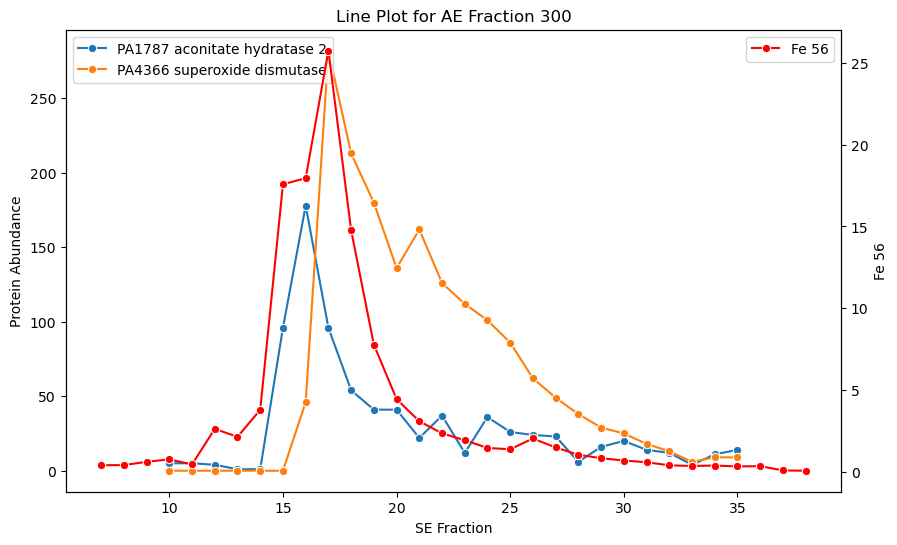

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Define the AE fraction parameter
ae_fraction = 300

# Filter data for the specified AE fraction
protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

# Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PA4266 (Protein Abundance)
sns.lineplot(data=protein_data, x='SE Fraction', y='PA1787', marker='o', ax=ax1, label='PA1787 aconitate hydratase 2') #label='PA4880'
ax1.set_xlabel('SE Fraction')
#ax1.set_ylabel('PA1787 (Protein Abundance)')
#ax1.legend(loc='upper left')
sns.lineplot(data=protein_data, x='SE Fraction', y='PA4366', marker='o', ax=ax1, label='PA4366 superoxide dismutase') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')

# Create a secondary y-axis for Fe 56
ax2 = ax1.twinx()
sns.lineplot(data=metal_data, x='SE Fraction', y='Fe 56', marker='o', ax=ax2, color='r', label='Fe 56')
ax2.set_ylabel('Fe 56')
ax2.legend(loc='upper right')

# Add a title
plt.title(f"Line Plot for AE Fraction {ae_fraction}")

# Show the plot
plt.show()


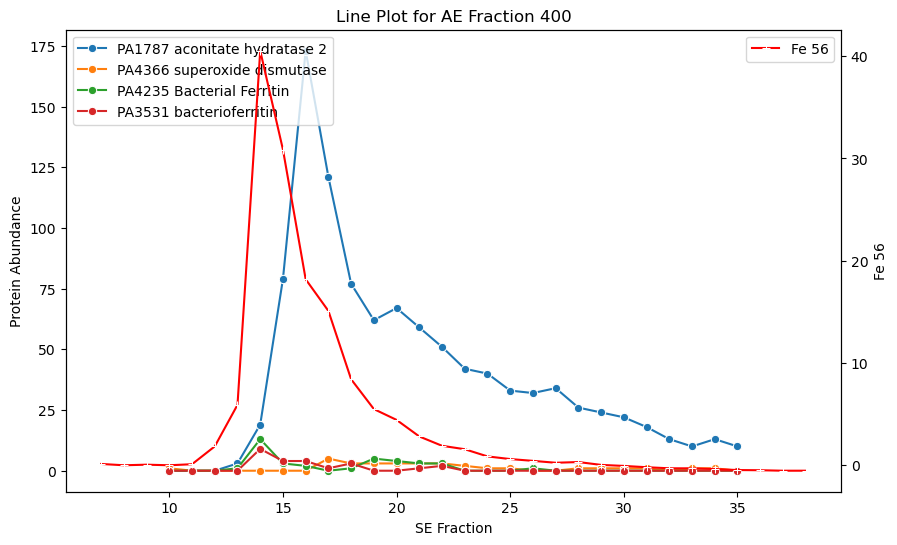

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Excel file and specific sheets
m_oxic = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='metals_oxic', usecols='A:Q', skiprows=0)
pr_o_annot = pd.read_excel('pa254_metallome_data_10282024.xlsx', sheet_name='pr_o_pivot2', usecols='A:BCT', header=0, skiprows=0)
pr_o = pr_o_annot.drop([0, 1])

# Setting the first column (Sample_ID) as the index for metals data
m_oxic.set_index('Sample_ID', inplace=True)

# Define the AE fraction parameter
ae_fraction = 400

# Filter data for the specified AE fraction
protein_data = pr_o[pr_o['AE Fraction'] == ae_fraction]
metal_data = m_oxic[m_oxic['AE Fraction'] == ae_fraction]

# Create a line plot with X: SE Fraction, Y: PA4266, Y2: Fe 56 using seaborn
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PA4266 (Protein Abundance)
sns.lineplot(data=protein_data, x='SE Fraction', y='PA1787', marker='o', ax=ax1, label='PA1787 aconitate hydratase 2') #label='PA4880'
ax1.set_xlabel('SE Fraction')
#ax1.set_ylabel('PA1787 (Protein Abundance)')
#ax1.legend(loc='upper left')
sns.lineplot(data=protein_data, x='SE Fraction', y='PA4366', marker='o', ax=ax1, label='PA4366 superoxide dismutase') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')

sns.lineplot(data=protein_data, x='SE Fraction', y='PA4235', marker='o', ax=ax1, label='PA4235 Bacterial Ferritin') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')
sns.lineplot(data=protein_data, x='SE Fraction', y='PA3531', marker='o', ax=ax1, label='PA3531 bacterioferritin') #label='PA4880'
ax1.set_xlabel('SE Fraction')
ax1.set_ylabel('Protein Abundance')
ax1.legend(loc='upper left')

# Create a secondary y-axis for Fe 56
ax2 = ax1.twinx()
sns.lineplot(data=metal_data, x='SE Fraction', y='Fe 56', marker='+', ax=ax2, color='r', label='Fe 56')
ax2.set_ylabel('Fe 56')
ax2.legend(loc='upper right')

# Add a title
plt.title(f"Line Plot for AE Fraction {ae_fraction}")

# Show the plot
plt.show()
